# Assignment Honour Code
I solemnly swear that I have not discussed my assignment solutions with anyone in any way and the solutions I am submitting are my own personal work.

Full Name: Ancy Rex

# QUESTION 2

## Loading the data

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None) 
import requests

# loading the data from data file
data_pf = './data/A2_Q2.csv'
data2 = pd.read_csv(data_pf)
data2=pd.DataFrame(data2)
# new dataset created for working
data2_copy =pd.DataFrame(data2.copy())
data2_copy.head(10)

,ID,Target,Score
0,1,False,0.46
1,2,False,0.14
2,3,False,0.48
3,4,True,0.91
4,5,False,0.24
5,6,True,0.79
6,7,False,0.17
7,8,False,0.11
8,9,False,0.54
9,10,True,0.32


## Part A

True is considered as the postive target level with score threshold of 0.5. The target column is changed from boolean type to string type for easier access of prediction outcome,which is divided in 4 parts True Positive, False Positive, True Negative ,and False Negative values.
<br  />True Positive (Target = True, Score >= 0.50)
<br  />False Negative (Target = True, Score < 0.50)
<br  />False Positive (Target = False, Score >= 0.50)
<br  />True Negative (Target = False, Score < 0.50)

In [2]:
# changing boolean to string
data2_copy['Target'] = data2_copy['Target'].astype('str')

conf_matrix function was used to check each of the values in the dataset with the score threshold values to replace them with TN,TP,FP and FN. The appended values were then put into a list. 

In [3]:
# appending prediction outcome values with the help of threshold values
column1 = []
def conf_matrix():
    for i in range(0,30):
        if((data2_copy.loc[i,'Target'] == 'True') & (data2_copy.loc[i,'Score'] < 0.50)):
            column1.append("FN")
        elif((data2_copy.loc[i,'Target'] == 'True') & (data2_copy.loc[i,'Score'] >= 0.50)):
            column1.append("TP")
        elif((data2_copy.loc[i,'Target'] == 'False') & (data2_copy.loc[i,'Score'] < 0.50)):
            column1.append("TN")
        elif((data2_copy.loc[i,'Target'] == 'False') & (data2_copy.loc[i,'Score'] >= 0.50)):
            column1.append("FP")
        else:
            print("Invalid")
    print(column1)
    
conf_matrix()

['TN', 'TN', 'TN', 'TP', 'TN', 'TP', 'TN', 'TN', 'FP', 'FN', 'TN', 'TP', 'FN', 'TP', 'FP', 'FN', 'TP', 'TN', 'TN', 'FP', 'TN', 'TP', 'FP', 'FP', 'TP', 'TP', 'FN', 'FP', 'TP', 'TN']


The count of each of the 4 values in the list was then displayed to obtain the confusion matrix.

In [4]:
#initialising to variables
true_pos = column1.count("TP")
false_pos = column1.count("FP")
true_neg = column1.count("TN")
false_neg = column1.count("FN")

print("True Postive:",true_pos)
print("True Negative:",true_neg)
print("False Postive:",false_pos)
print("False Negative:",false_neg)

True Postive: 9
True Negative: 11
False Postive: 6
False Negative: 4


The confusion matrix was then constructed using the value count of the list.

### <center>Confusion Matrix</center>
| Prediction / Target | True | False |
| --- | --- | --- |
| True | 9 | 6 |
| False | 4 | 11 |

## Part B 

1. Error Rate :
<center><font size="2">$$\frac{FP+FN}{TP+TN+FP+FN} $$</font></center>

2. Precision :
<center><font size="2">$$\frac{TP}{TP+FP} $$</font></center>
          
3. True Positive Rate (TPR) :
<center><font size="2">$$\frac{TP}{TP+FN} $$</font></center>

4. F1-Score :
<center><font size="2">$$2* \frac{Precision * Recall}{Precision+Recall} $$</font></center>

5. False Positive Rate (FPR) :
<center><font size="2">$$\frac{FP}{TN+FP} $$</font></center>

In [5]:
# calculation of the 5 metrics
err_rate = (false_pos + false_neg)/(true_pos + false_pos + true_neg + false_neg)
precision = true_pos/(true_pos + false_pos)
tpr = true_pos/(true_pos + false_neg)
f1_score = 2*((precision * tpr)/(precision + tpr))
fpr = false_pos/(true_neg + false_pos)

## Part C

Assuming that the score threshold vary from 0.1 to 0.9 with increment of 0.1. A dictionary was created with 9 list in them so as to store the prediction outcomes with different threshold in each of them.

In [6]:
# calculation of different prediction outcomes in different threshold
obj = {}
column1=[]
threshold = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
length = len(threshold) 
for i in range(length):
    obj['l'+str(i)] = []
def conf_matrix():
    for i in range(0,30):
       # print(obj)
        for j in range(length):
            if((data2_copy.loc[i,'Target'] == 'True') & (data2_copy.loc[i,'Score'] < threshold[j])):
                obj['l'+str(j)].append("FN")  
            elif((data2_copy.loc[i,'Target'] == 'True') & (data2_copy.loc[i,'Score'] >=  threshold[j])):
                obj['l'+str(j)].append("TP")  
            elif((data2_copy.loc[i,'Target'] == 'False') & (data2_copy.loc[i,'Score'] <  threshold[j])):
                obj['l'+str(j)].append("TN")  
            elif((data2_copy.loc[i,'Target'] == 'False') & (data2_copy.loc[i,'Score'] >=  threshold[j])):
                 obj['l'+str(j)].append("FP")  
            else:
                print("Invalid")
                
    print(obj)
    
conf_matrix()            

{'l0': ['FP', 'FP', 'FP', 'TP', 'FP', 'TP', 'FP', 'FP', 'FP', 'TP', 'FP', 'TP', 'TP', 'TP', 'FP', 'TP', 'TP', 'FP', 'FP', 'FP', 'TN', 'TP', 'FP', 'FP', 'TP', 'TP', 'TP', 'FP', 'TP', 'FP'], 'l8': ['TN', 'TN', 'TN', 'TP', 'TN', 'FN', 'TN', 'TN', 'TN', 'FN', 'TN', 'FN', 'FN', 'FN', 'TN', 'FN', 'FN', 'TN', 'TN', 'TN', 'TN', 'FN', 'TN', 'TN', 'FN', 'FN', 'FN', 'TN', 'FN', 'TN'], 'l7': ['TN', 'TN', 'TN', 'TP', 'TN', 'FN', 'TN', 'TN', 'TN', 'FN', 'TN', 'FN', 'FN', 'TP', 'TN', 'FN', 'TP', 'TN', 'TN', 'FP', 'TN', 'TP', 'TN', 'TN', 'FN', 'FN', 'FN', 'TN', 'FN', 'TN'], 'l5': ['TN', 'TN', 'TN', 'TP', 'TN', 'TP', 'TN', 'TN', 'TN', 'FN', 'TN', 'FN', 'FN', 'TP', 'TN', 'FN', 'TP', 'TN', 'TN', 'FP', 'TN', 'TP', 'FP', 'FP', 'TP', 'TP', 'FN', 'FP', 'TP', 'TN'], 'l1': ['FP', 'TN', 'FP', 'TP', 'FP', 'TP', 'TN', 'TN', 'FP', 'TP', 'FP', 'TP', 'TP', 'TP', 'FP', 'TP', 'TP', 'FP', 'FP', 'FP', 'TN', 'TP', 'FP', 'FP', 'TP', 'TP', 'TP', 'FP', 'TP', 'TN'], 'l2': ['FP', 'TN', 'FP', 'TP', 'TN', 'TP', 'TN', 'TN', 'FP'

The dictionary was then converted to a dataframe for further working. Each list was turned to a column thus giving us 9 columns in the dataset. 

In [7]:
# initialising to dataframe
pred_outcome=pd.DataFrame(obj)

The 4 prediction outcomes for each of the threshold was displayed using the value count taken for each of the column.

In [8]:
# value count of prediction outcomes
for i in range(0,8):
    print("Threshold =",threshold[i])
    print(pred_outcome['l'+str(i)].value_counts())

Threshold = 0.1
FP    16
TP    13
TN     1
Name: l0, dtype: int64
Threshold = 0.2
TP    13
FP    12
TN     5
Name: l1, dtype: int64
Threshold = 0.3
TP    12
FP    10
TN     7
FN     1
Name: l2, dtype: int64
Threshold = 0.4
TP    11
TN     9
FP     8
FN     2
Name: l3, dtype: int64
Threshold = 0.5
TN    11
TP     9
FP     6
FN     4
Name: l4, dtype: int64
Threshold = 0.6
TN    13
TP     8
FN     5
FP     4
Name: l5, dtype: int64
Threshold = 0.7
TN    15
FN     7
TP     6
FP     2
Name: l6, dtype: int64
Threshold = 0.8
TN    16
FN     9
TP     4
FP     1
Name: l7, dtype: int64


The TPR and FPR was found for each of the threshold (0.1 - 0.9)using the following formula.
<br  />True Positive Rate (TPR) :
<center><font size="2">$$\frac{TP}{TP+FN} $$</font></center>

<br  />False Positive Rate (FPR) :
<center><font size="2">$$\frac{FP}{TN+FP} $$</font></center>
<br  /> The 9 TPR and FPR values were rounded off to 3 decimal points and appended into lists.

In [9]:
# calculating TPR and FPR values and initialising it to lists
TPR=[]
FPR=[]
for i in range(0,9):
    true_postive = (pred_outcome['l'+str(i)] == 'TP').sum()
    true_negative = (pred_outcome['l'+str(i)] == 'TN').sum()
    false_postive = (pred_outcome['l'+str(i)] == 'FP').sum()
    false_negative = (pred_outcome['l'+str(i)] == 'FN').sum()
    TPR.append(round((true_postive/(true_postive+false_negative)),3))
    FPR.append(round((false_postive/(false_postive+true_negative)),3))
print(TPR)
print(FPR)

[1.0, 1.0, 0.923, 0.846, 0.692, 0.615, 0.462, 0.308, 0.077]
[0.941, 0.706, 0.588, 0.471, 0.353, 0.235, 0.118, 0.059, 0.0]


## Resulting Datasets

df_metrics was constructed to hold the values of the Error Rate, Precision, TPR, F1-Score and FPR metrics. It consists of  2 columns with metrics in one and the corresponding value in the value column.

In [10]:
#construction of df_metrics dataframe
df_metrics = pd.DataFrame(columns=['Metric', 'Value'])
df_metrics.loc[len(df_metrics)] = ['Error Rate',round(err_rate,3)]
df_metrics.loc[len(df_metrics)] = ['Precision',round(precision,3)]
df_metrics.loc[len(df_metrics)] = ['TPR',round(tpr,3)]
df_metrics.loc[len(df_metrics)] = ['F1-Score',round(f1_score,3)]
df_metrics.loc[len(df_metrics)] = ['FPR',round(fpr,3)]

df_metrics

,Metric,Value
0,Error Rate,0.333
1,Precision,0.600
2,TPR,0.692
3,F1-Score,0.643
4,FPR,0.353


df_roc was constructed to hold the 9 threshold values with their corresponsding TPR and FPR values. It consists of three columns i.e. Threshold (0.1 - 0.9) and TPR and FPR lists which were converted to columns.

In [11]:
#construction of df_roc dataframe
df_roc= pd.DataFrame({'Threshold' : threshold, 'TPR': TPR, 'FPR': FPR})
column_names = ["Threshold", "TPR", "FPR"]

df_roc = df_roc.reindex(columns=column_names)
df_roc

,Threshold,TPR,FPR
0,0.1,1.000,0.941
1,0.2,1.000,0.706
2,0.3,0.923,0.588
3,0.4,0.846,0.471
4,0.5,0.692,0.353
5,0.6,0.615,0.235
6,0.7,0.462,0.118
7,0.8,0.308,0.059
8,0.9,0.077,0.000


## Part D

The ROC curve is when TPR(y axis) is plotted against FPR(x axis). The closer the curve is towards the lefthand-top border of the space, then the test is most accurate with 100% sensitivity, and 100% specificity. If the curve is closer to the diagonal of the space, the test is less accurate. In this case the curve lies closer to the left-hand top space and away from the the diagonal thus making our test most accurate.

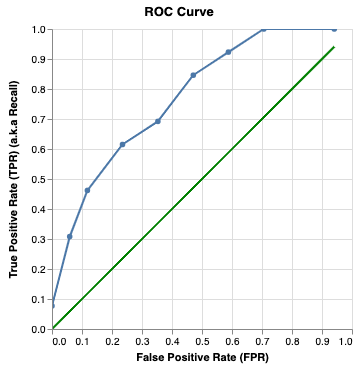

In [12]:
#Construction of ROC curve
import altair as alt
alt.renderers.enable('notebook')
base = alt.Chart(df_roc, 
                 title='ROC Curve'
                ).properties(width=300)

roc_curve = base.mark_line(point=True).encode(
    alt.X('FPR', title='False Positive Rate (FPR)',  sort=None),
    alt.Y('TPR', title='True Positive Rate (TPR) (a.k.a Recall)'),
)

roc_rule = base.mark_line(color='green').encode(
    x='FPR',
    y='FPR',
    size=alt.value(2)
)

(roc_curve + roc_rule).interactive()